## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import numpy as np

# Study data files

#mouse_metadata_path = "../pymaceuticals/data/Mouse_metadata.csv"
#study_results_path = "../pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Pymaceuticals/data/Mouse_metadata.csv")
study_results = pd.read_csv("Pymaceuticals/data/Study_results.csv")

# Combine the data into a single datasetcombined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")


# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].count()
mice_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_byID = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_byID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicate_allrows = combined_df[combined_df.duplicated(['Mouse ID',])]
data_duplicate_allrows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_df.drop_duplicates("Mouse ID")
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
# There are 249 mice in the clean dataframe

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
statistics_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

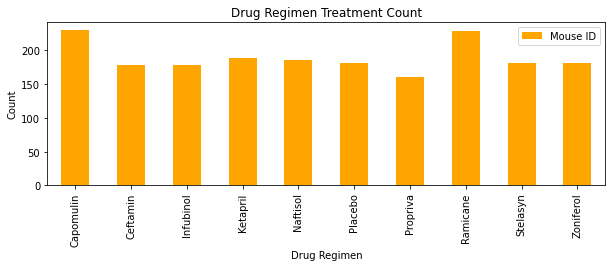

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot using Pandas's DataFrame.plot() showing the total number of mice for each treatment throughout the course of the study using pandas. 
drugregimen_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
#Filter the DataFrame down to columns Drug regimen based on mouseid
drugregimen_df = drugregimen_data[["Drug Regimen", "Mouse ID"]]
drugregimen_df = drugregimen_df.set_index("Drug Regimen") #Set the index to be "Drug Regimen"
#plt.xlabel("Drug Regimen")
#drugregimen_df.plot("Drug Regimen", "Mouse ID"],color="orange, label="Drug Regimen")
drugregimen_df.plot(kind="bar", figsize=(10,3), color ="orange") #Type of chart is bar
plt.title("Drug Regimen Treatment Count")
plt.ylabel("Count")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Count')

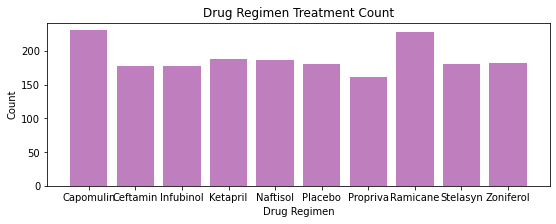

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
xaxis_drug = statistics_df.index.tolist()
#xaxis_drug
yaxis_drugcount = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
#yaxis_drug
plt.figure(figsize=(9,3))
plt.bar(xaxis_drug, yaxis_drugcount, color='purple', alpha=0.5, align="center")
#plt.legend(loc="upper right")
#plt.show()
plt.title("Drug Regimen Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(0.5, 1.0, 'Male & Female Mice Percentage')

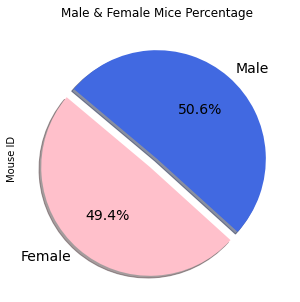

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["pink", "royalblue"]
explode = (0.1, 0)
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.plot(kind="pie", y = "Mouse ID", figsize=(5,5), autopct='%1.1f%%', colors = colors,
              startangle=140, shadow=True, labels=gender_df["Sex"],
               legend = False,explode = explode, fontsize=14)
plt.title("Male & Female Mice Percentage")


([<matplotlib.patches.Wedge at 0x7f8769a51bd0>,
 [Text(-0.7885345448675751, -0.9045514200699076, 'Female'),
  Text(0.7228233327952773, 0.8291721350640819, 'Male')],
 [Text(-0.4599784845060854, -0.5276549950407794, '49.4%'),
  Text(0.39426727243378756, 0.4522757100349537, '50.6%')])

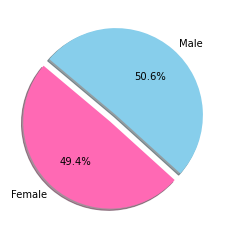

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female","Male"]
percent = [49.4,50.6]
colors = ['hotpink', 'skyblue']
explode = (0.1, 0)
plt.pie(percent, labels=gender, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [12]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin.Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers 
#across all four treatment regimens.

In [13]:
# list of the four drugs
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
check_isdrugs = combined_df[combined_df['Drug Regimen'].isin(drug_list)]
check_isdrugs


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [14]:
check_isdrugs.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
drugregimens_sort = combined_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
drugregimens_sort.head()

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Turn retrieved data into dataframe to easily manipulate
drugregimens_df = drugregimens_sort.to_frame()
drugregimens_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

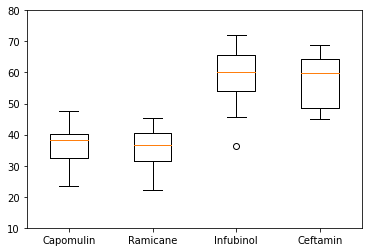

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finaltv_mousedf = drugregimens_df.reset_index()
tumor_lists = finaltv_mousedf.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(drug_list)
tumor_volumes = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=drug_list)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

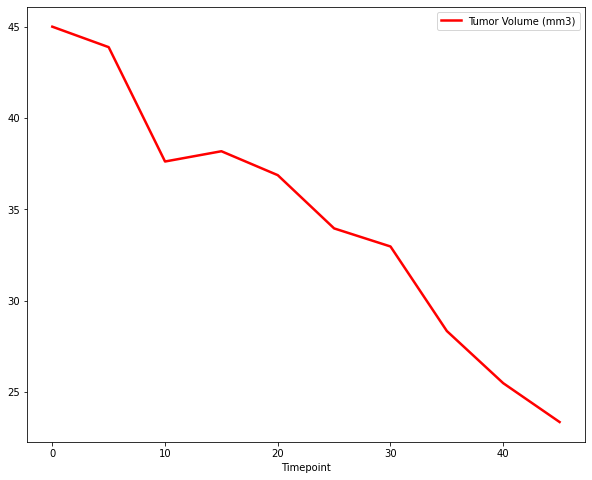

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulindrug_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
mouseid_cap_df = capomulindrug_df.loc[capomulindrug_df["Mouse ID"] == "s185"]
#mouseid_cap_df
mouseid_cap_df = mouseid_cap_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseid_cap_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='red')

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulindrug_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


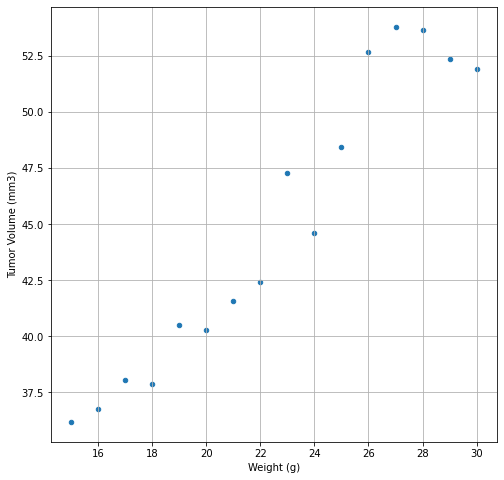

In [20]:
drug_cap_scatter = combined_df[combined_df["Drug Regimen"].isin(["Capomulin"])]

check_isdrugs_df = check_isdrugs[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
#using group by weight and Tumor volume (mm3)
drug_groupby_weight = pd.DataFrame(check_isdrugs_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()).reset_index()
#Create Scatter plot
scatter_plot_drugcap = drug_groupby_weight.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)',
                                           grid = True, figsize= (8,8))
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#sklearn.linear_model.LinearRegression¶

mouse_weight = capomulindrug_df.groupby(capomulindrug_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = capomulindrug_df.groupby(capomulindrug_df["Mouse ID"])["Tumor Volume (mm3)"].mean()
# Caculate correlation coefficient
correlation_coefficient = round((mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {correlation_coefficient}')

The correlation between weight and tumor value is Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64


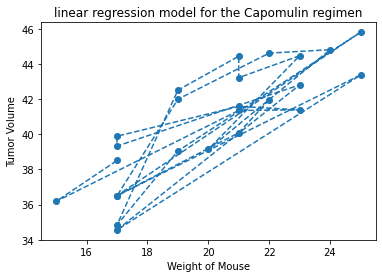

In [22]:
#Trying to locate x-axis and y-axis to be fit in model
model = LinearRegression()
plt.scatter(mouse_weight,tumor_volume)
plt.title("linear regression model for the Capomulin regimen")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,tumor_volume,"--")
plt.show()